In [ ]:
#
# This notebook is for the exploration of Logistic Regression -- it corresponds to handout-02
# https://frcs.github.io/4C16-LectureNotes/logistic-regression.html
#

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/4c16-labs/code/lab-02/

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/4c16-labs/code/lab-02


In [ ]:
# Autoload setup (you don't need to edit this cell); instructions to:
#   i) enable autoreloading of modules
%load_ext autoreload
#  ii) import the module 'lab_1' (which will contain your functions) in an autoreloadable way
%aimport lab_2
# iii) indicate that we want autoreloading to happen on every evaluation.
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
##############################################################
#
# 1: import
#
##############################################################

import pandas as pd        # for datasets
import numpy as np         # for linear algebra
from tqdm import tqdm      # for progress bars

import matplotlib as mpl   # for plotting graphs
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

%matplotlib inline


In [ ]:
# sets default style for graphs

plt.style.use('ggplot')
plt.rcParams['lines.linewidth'] = 1.7
plt.rcParams["figure.figsize"] = (10,6)


In [ ]:
##############################################################
#
# 2. loading the ISLR 'Default' dataset
#
##############################################################

# see https://cran.r-project.org/web/packages/ISLR/ISLR.pdf
#
# This data set contains information on ten thousand customers.
#
# The aim here is to predict which customers will default on their credit card debt.
#
# The dataset contains 10000 observations on the following 4 variables.
#   * 'default': a No/Yes label indicating whether the customer defaulted on their debt
#   * 'student': a No/Yes label indicating whether the customer is a student
#   * 'balance': the average balance that the customer has remaining on their credit card after making
#                their monthly payment
#   * 'income' : income of customer

df = pd.read_csv('Default.csv')

# we are using here the pandas python package to read the CSV file.
# we can look at the first 10 observations

df.head(10)

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625070
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138950
3,4,No,No,529.250605,35704.493940
4,5,No,No,785.655883,38463.495880
5,6,No,Yes,919.588531,7491.558572
6,7,No,No,825.513331,24905.226580
7,8,No,Yes,808.667504,17600.451340
8,9,No,No,1161.057854,37468.529290
9,10,No,No,0.000000,29275.268290


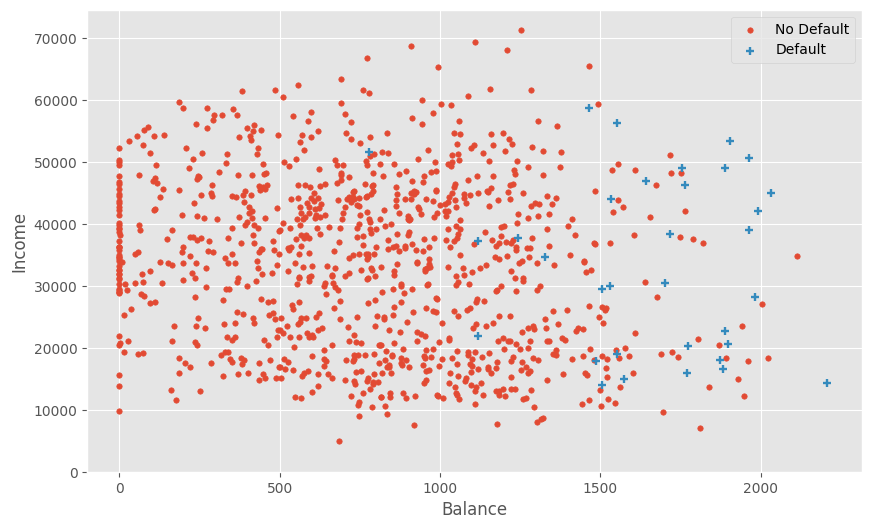

In [ ]:
##############################################################
#
# 3. visualise your data
#
##############################################################

# We need to visualise our data
# let's ignore the categorical features 'student' and the first column
# and focus on the 'balance' and 'income' features

balance = df['balance'].values
income = df['income'].values

# the outcome is of boolean type, converting it to vector of integers
y = (df['default'].values == 'Yes').astype(int)

# we are only going to plot a subset of the data
income_subset = income[0:1000];
balance_subset = balance[0:1000];
y_subset = y[0:1000];

# plotting balance vs income for the 'No Default' class
plt.scatter(balance_subset[y_subset == 0],
            income_subset[y_subset == 0],
            s=15, marker='o')

# plotting balance vs income for the 'Default' class
plt.scatter(balance_subset[y_subset == 1],
            income_subset[y_subset == 1],
            s=40, marker='+')

plt.ylim(ymin=0)
plt.ylabel('Income')
plt.xlim(xmin=-100)
plt.xlabel('Balance')
plt.legend(['No Default', 'Default'])
plt.show()

# after a quick look at the graph, it appears that
# the most relevant feature is 'balance'


In [ ]:
# Exercise 1: implement cross-entropy (in the lab_2 module)

w_test = np.array([[0.1], [0.3]])
X_test = np.array([[1,1], [1,0], [3,2]])
y_test = np.array([[0], [1], [1]])
print(lab_2.cross_entropy(w_test, X_test, y_test))

# Should print 0.632853327993248 if your function is working.

[[0.59868766]
 [0.52497919]
 [0.7109495 ]]
[[0]
 [1]
 [1]]
[[0 1 1]]
3
(1, 3)
[[0.59868866]
 [0.52498019]
 [0.7109505 ]]
0.632853327993248


In [ ]:
# Exercise 2: implement gradient computation (in the lab_2 module)

w_test = np.array([0.1, 0.3])
X_test = np.array([[1,1], [1,0]])
y_test = np.array([0, 1])
print(lab_2.gradient(w_test, X_test, y_test))
# Expected result: [ 0.06183342  0.29934383]

[0.06183342 0.29934383]


In [ ]:
# The gradient descent algorithm as explained in lecture notes
# the learning_rate refers to the greek letter 'eta'
# The method also returns the vectors of
#   loss function, sampled iterations, weights

def gradient_descent(w0, X, y, learning_rate=0.01, maxit=1000):
    print("starting gradient descent")
    w = w0
    n = X.shape[0]
    p = X.shape[1]
    step = 83 # interval between measures
    m = (maxit // step) + 1 # nb of checks
    loss = np.zeros((m,1))
    its = np.zeros((m,1))
    ws = np.zeros((m,p))

    for i in tqdm(range(0, maxit)):
        # monitoring the loss at regular intervals
        if (i % step == 0):
            j = i // step
            loss[j] = lab_2.cross_entropy(w, X, y)
            its[j] = i
            ws[j,0:p] = w.ravel()

        # computing the loss gradient
        grad = lab_2.gradient(w,X,y);

        # updating the weights
        w = w - learning_rate * grad;
        i = i + 1
        #print (loss)
    #print(i)
    #print(lab_2.gradient(w,X,y))
    return w, loss, its, ws


(10000, 2)
(10000, 2)
starting gradient descent


  2%|▏         | 83/5000 [00:00<00:05, 824.27it/s]

[0.5 0.5 0.5 ... 0.5 0.5 0.5]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[0.500001 0.500001 0.500001 ... 0.500001 0.500001 0.500001]
[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]


  3%|▎         | 167/5000 [00:00<00:05, 807.67it/s]

[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]


  5%|▌         | 268/5000 [00:00<00:05, 895.51it/s]

[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]
[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]


  7%|▋         | 358/5000 [00:00<00:05, 883.36it/s]

[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]


  9%|▉         | 447/5000 [00:00<00:05, 852.89it/s]

[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]


 11%|█         | 533/5000 [00:00<00:06, 665.04it/s]

[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]


 12%|█▏        | 606/5000 [00:00<00:08, 539.09it/s]

[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]


 15%|█▍        | 729/5000 [00:01<00:07, 551.97it/s]

[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]


 17%|█▋        | 845/5000 [00:01<00:07, 541.64it/s]

[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]


 18%|█▊        | 901/5000 [00:01<00:07, 532.65it/s]

[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]


 19%|█▉        | 956/5000 [00:01<00:07, 514.87it/s]

[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]


 23%|██▎       | 1163/5000 [00:02<00:08, 459.17it/s]

[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]
[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]


 26%|██▌       | 1311/5000 [00:02<00:07, 472.59it/s]

[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]
[1. 1. 1. ... 1. 1. 1.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.000001 1.000001 1.000001 ... 1.000001 1.000001 1.000001]


 29%|██▉       | 1468/5000 [00:02<00:07, 499.42it/s]

[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]
[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]


 34%|███▍      | 1698/5000 [00:03<00:05, 558.72it/s]

[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]
[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]


 36%|███▋      | 1817/5000 [00:03<00:05, 573.34it/s]

[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]
[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]


 39%|███▊      | 1934/5000 [00:03<00:06, 489.54it/s]

[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]


 42%|████▏     | 2093/5000 [00:03<00:05, 493.02it/s]

[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]
[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]


 46%|████▌     | 2275/5000 [00:04<00:04, 551.25it/s]

[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]
[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]


 48%|████▊     | 2396/5000 [00:04<00:04, 574.20it/s]

[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]
[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]


 51%|█████▏    | 2569/5000 [00:04<00:04, 525.61it/s]

[1. 1. 1. ... 1. 1. 1.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.000001 1.000001 1.000001 ... 1.000001 1.000001 1.000001]
[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]


 55%|█████▍    | 2739/5000 [00:05<00:04, 508.39it/s]

[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]
[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]


 58%|█████▊    | 2909/5000 [00:05<00:03, 547.19it/s]

[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]
[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]


 62%|██████▏   | 3088/5000 [00:05<00:03, 544.81it/s]

[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]
[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]


 64%|██████▍   | 3210/5000 [00:05<00:03, 532.34it/s]

[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]
[1. 1. 1. ... 1. 1. 1.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.000001 1.000001 1.000001 ... 1.000001 1.000001 1.000001]


 67%|██████▋   | 3370/5000 [00:06<00:03, 493.26it/s]

[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]
[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]


 73%|███████▎  | 3673/5000 [00:06<00:01, 845.08it/s]

[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]
[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]
[1. 1. 1. ... 1. 1. 1.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.000001 1.000001 1.000001 ... 1.000001 1.000001 1.000001]


 78%|███████▊  | 3880/5000 [00:06<00:01, 913.66it/s]

[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]
[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]
[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]


 82%|████████▏ | 4081/5000 [00:06<00:00, 923.99it/s]

[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]
[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]
[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]


 88%|████████▊ | 4420/5000 [00:07<00:00, 1029.95it/s]

[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]
[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]
[1. 1. 1. ... 1. 1. 1.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.000001 1.000001 1.000001 ... 1.000001 1.000001 1.000001]


 93%|█████████▎| 4649/5000 [00:07<00:00, 1082.66it/s]

[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]
[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]
[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]


 97%|█████████▋| 4868/5000 [00:07<00:00, 1066.91it/s]

[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]
[1. 1. 1. ... 1. 1. 1.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.000001 1.000001 1.000001 ... 1.000001 1.000001 1.000001]
[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]


100%|██████████| 5000/5000 [00:07<00:00, 638.45it/s] 


[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.e-06 1.e-06 1.e-06 ... 1.e-06 1.e-06 1.e-06]
[-6547.44035874  -687.98866258]


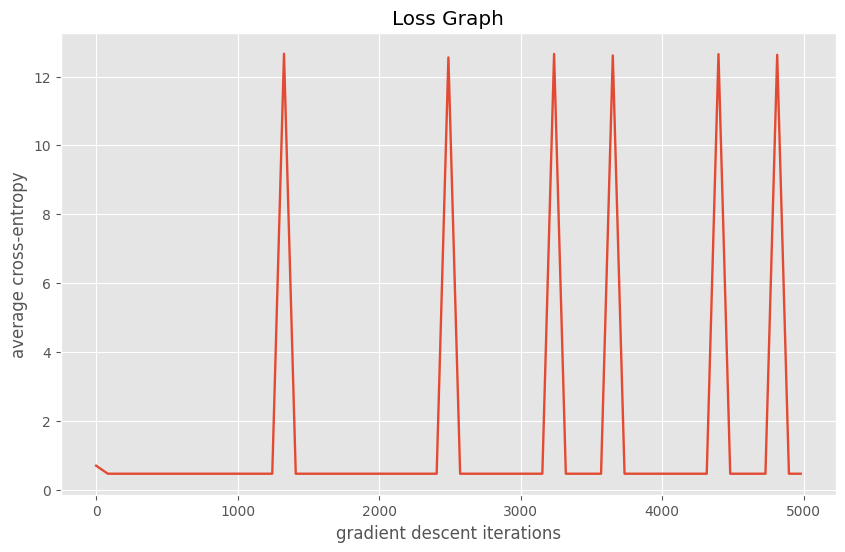

In [ ]:
#
# Setting up the Model and Design Matrix
#
# in this lab we will look at the following model:
# y = [ w0 + w1 * balance > 0]
#
# and ignore the 'income' feature

n = balance.shape[0]  # number of observations
p = 2                 # number of features

X = np.zeros(shape=(n, p))
print(X.shape)

# the first feature is 1 (with associated weight w0)
X[:,0] = 1;

# the second feature is the balance values (with associated weight w1)
X[:,1] = balance[:]
print(X.shape)

# initial weights
w0 = np.array([0,0]);

# starting gradient descent optimisation with some default parameters
w, loss, its, ws = gradient_descent(w0, X, y, learning_rate=40, maxit=5000);
print(w)

# plot of the loss graph, ie.
plt.plot(its, loss)
plt.title("Loss Graph")
plt.xlabel('gradient descent iterations')
plt.ylabel('average cross-entropy')
plt.show()


In [ ]:
# if you look carefully, you will find that the gradient descent is not working
# very well. You can see this because the overall loss is not going down, oscillates
# and never gets low enough (eg. avg cross-entropy > .5, when we would like something < 0.1)

In [ ]:
# to better study the convergence issues, we'll also plot the weights
# we encapsulate all these plots a single function:

def plot_loss_graph_and_weight_evolution(loss, ws, its):

  f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

  f.set_figheight(15)
  f.set_figwidth(15)

  ax1.plot(its, loss)
  ax1.set_xlabel('gradient descent iterations')
  ax1.set_ylabel('average cross-entropy')

  ax2.plot(ws[:,0], ws[:,1],
          color='g', marker='o',
          linestyle='dashed', linewidth=0.5, markersize=4)
  ax2.set_title('Evolution of the Weights')
  ax2.set_xlabel('$w_0$')
  ax2.set_ylabel('$w_1$')

  ax3.plot(its, ws[:,0], 'g-')
  ax3.set_title('Evolution of $w_0$')
  ax3.set_xlabel('gradient descent iterations')
  ax3.set_ylabel('$w_0$')

  ax4.plot(its, ws[:,1], 'g-')
  ax4.set_title('Evolution of $w_1$')
  ax4.set_xlabel('gradient descent iterations')
  ax4.set_ylabel('$w_1$')

  plt.show()

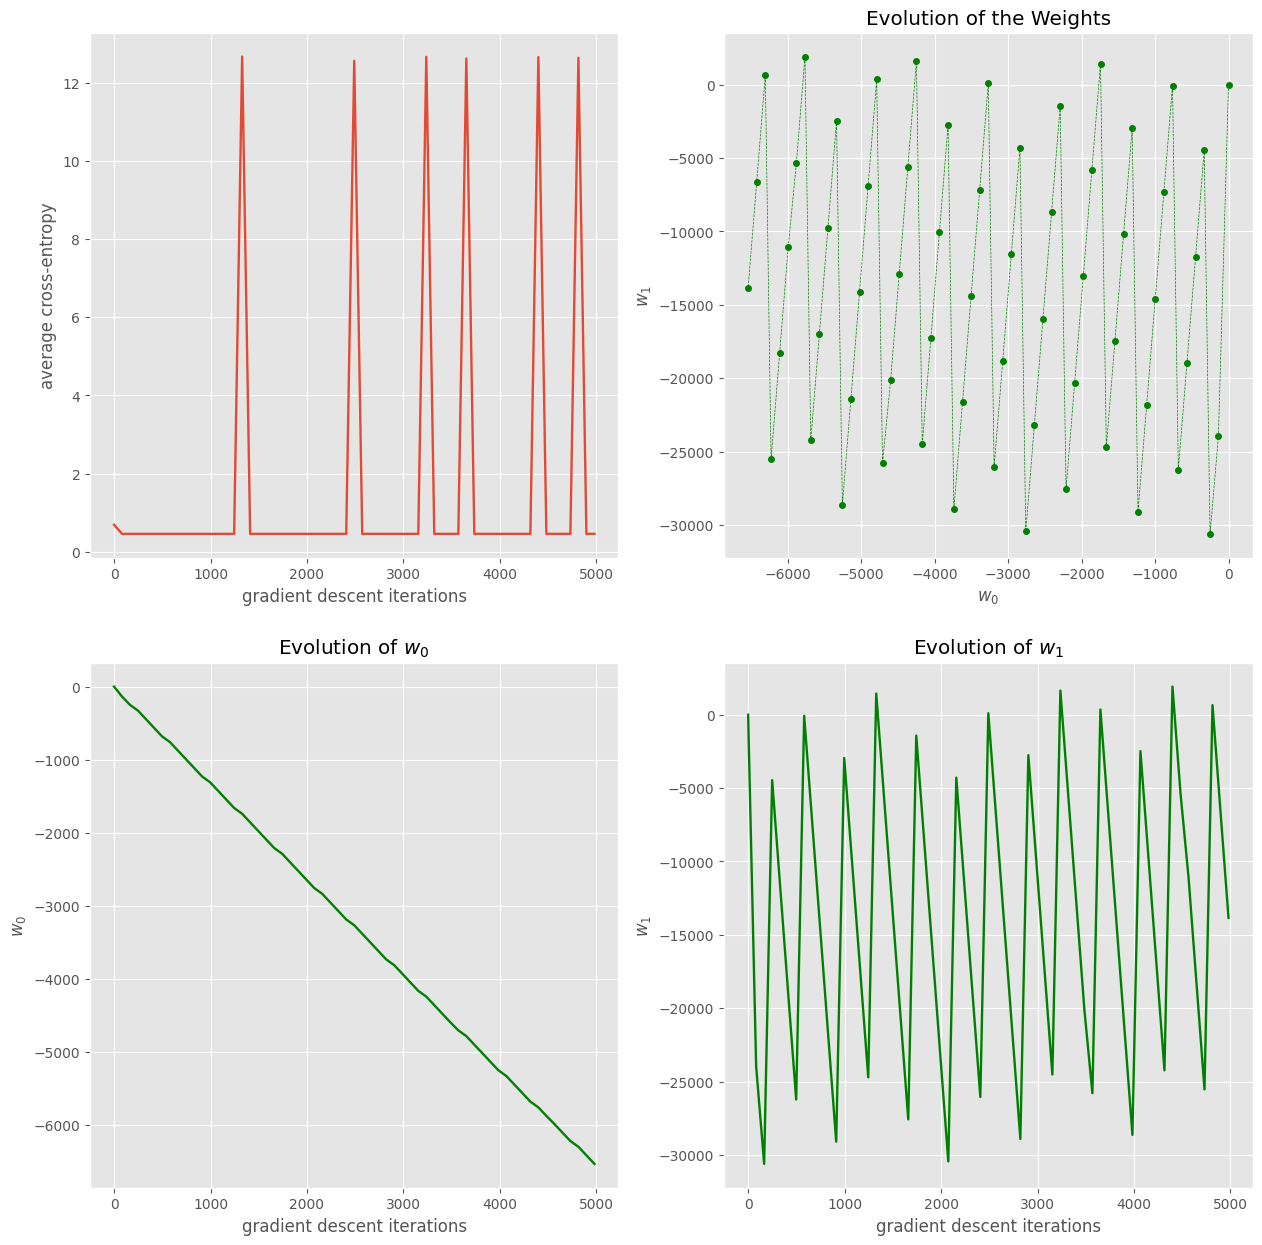

In [ ]:
# plotting the evloution of loss + weights

plot_loss_graph_and_weight_evolution(loss, ws, its)

# we can see that the weights are diverging



starting gradient descent


  2%|▏         | 114/5000 [00:00<00:04, 1132.88it/s]

[0.5 0.5 0.5 ... 0.5 0.5 0.5]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[0.500001 0.500001 0.500001 ... 0.500001 0.500001 0.500001]
[1.62380240e-03 3.01277967e-03 1.81634120e-02 ... 3.67561991e-03
 3.80269356e-01 3.87936626e-05]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.62480240e-03 3.01377967e-03 1.81644120e-02 ... 3.67661991e-03
 3.80270356e-01 3.97936626e-05]
[2.71213586e-04 4.71484142e-04 2.37300129e-03 ... 5.63384043e-04
 5.14461471e-02 9.65209138e-06]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[2.72213586e-04 4.72484142e-04 2.37400129e-03 ... 5.64384043e-04
 5.14471471e-02 1.06520914e-05]


  9%|▉         | 451/5000 [00:00<00:04, 1088.98it/s]

[4.98118562e-04 9.10897309e-04 5.30606493e-03 ... 1.10629582e-03
 1.39497217e-01 1.30504094e-05]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[4.99118562e-04 9.11897309e-04 5.30706493e-03 ... 1.10729582e-03
 1.39498217e-01 1.40504094e-05]
[1.59957399e-04 2.80035392e-04 1.43944180e-03 ... 3.35380904e-04
 3.30553698e-02 5.45842007e-06]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.60957399e-04 2.81035392e-04 1.44044180e-03 ... 3.36380904e-04
 3.30563698e-02 6.45842007e-06]
[5.23779958e-04 1.01336066e-03 6.95159677e-03 ... 1.25326040e-03
 2.26414758e-01 9.76409528e-06]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[5.24779958e-04 1.01436066e-03 6.95259677e-03 ... 1.25426040e-03
 2.26415758e-01 1.07640953e-05]


 13%|█▎        | 671/5000 [00:00<00:04, 1010.33it/s]

[2.31064537e-05 3.65697521e-05 1.40043551e-04 ... 4.23975257e-05
 1.87317654e-03 1.44969597e-06]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[2.41064537e-05 3.75697521e-05 1.41043551e-04 ... 4.33975257e-05
 1.87417654e-03 2.44969597e-06]
[7.31734365e-04 1.45611303e-03 1.08161651e-02 ... 1.81714851e-03
 3.49272754e-01 1.14968106e-05]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[7.32734365e-04 1.45711303e-03 1.08171651e-02 ... 1.81814851e-03
 3.49273754e-01 1.24968106e-05]
[7.44530981e-05 1.27612851e-04 6.16854697e-04 ... 1.51796528e-04
 1.28150528e-02 2.88767083e-06]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[7.54530981e-05 1.28612851e-04 6.17854697e-04 ... 1.52796528e-04
 1.28160528e-02 3.88767083e-06]


 18%|█▊        | 886/5000 [00:00<00:03, 1040.49it/s]

[4.28837723e-04 8.28883665e-04 5.67499484e-03 ... 1.02481136e-03
 1.91738027e-01 8.04397091e-06]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[4.29837723e-04 8.29883665e-04 5.67599484e-03 ... 1.02581136e-03
 1.91739027e-01 9.04397091e-06]
[2.80872609e-05 4.51558872e-05 1.81043151e-04 ... 5.26172391e-05
 2.64434041e-03 1.60302233e-06]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[2.90872609e-05 4.61558872e-05 1.82043151e-04 ... 5.36172391e-05
 2.64534041e-03 2.60302233e-06]
[7.71820199e-04 1.54457873e-03 1.16571216e-02 ... 1.93103844e-03
 3.74181275e-01 1.17176837e-05]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[7.72820199e-04 1.54557873e-03 1.16581216e-02 ... 1.93203844e-03
 3.74182275e-01 1.27176837e-05]


 22%|██▏       | 1082/5000 [00:01<00:05, 685.61it/s]

[1.06308483e-04 1.86815886e-04 9.71172933e-04 ... 2.24010772e-04
 2.30032892e-02 3.54680967e-06]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.07308483e-04 1.87815886e-04 9.72172933e-04 ... 2.25010772e-04
 2.30042892e-02 4.54680967e-06]
[5.01302997e-04 9.77642666e-04 6.86498555e-03 ... 1.21219866e-03
 2.32138851e-01 8.90665685e-06]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[5.02302997e-04 9.78642666e-04 6.86598555e-03 ... 1.21319866e-03
 2.32139851e-01 9.90665685e-06]


 25%|██▍       | 1227/5000 [00:01<00:06, 586.05it/s]

[2.29906090e-05 3.65260507e-05 1.41451878e-04 ... 4.23991345e-05
 1.93331189e-03 1.40948961e-06]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[2.39906090e-05 3.75260507e-05 1.42451878e-04 ... 4.33991345e-05
 1.93431189e-03 2.40948961e-06]
[7.26568641e-04 1.44748554e-03 1.07881538e-02 ... 1.80704705e-03
 3.50140063e-01 1.13374827e-05]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[7.27568641e-04 1.44848554e-03 1.07891538e-02 ... 1.80804705e-03
 3.50141063e-01 1.23374827e-05]


 28%|██▊       | 1408/5000 [00:01<00:06, 551.10it/s]

[7.45528167e-05 1.27870894e-04 6.19334338e-04 ... 1.52136862e-04
 1.29149687e-02 2.87967518e-06]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[7.55528167e-05 1.28870894e-04 6.20334338e-04 ... 1.53136862e-04
 1.29159687e-02 3.87967518e-06]
[4.28588066e-04 8.28542261e-04 5.67547856e-03 ... 1.02444546e-03
 1.91900527e-01 8.03103484e-06]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[4.29588066e-04 8.29542261e-04 5.67647856e-03 ... 1.02544546e-03
 1.91901527e-01 9.03103484e-06]


 31%|███▏      | 1574/5000 [00:02<00:07, 486.27it/s]

[2.80650097e-05 4.51214023e-05 1.80920008e-04 ... 5.25775396e-05
 2.64297141e-03 1.60147670e-06]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[2.90650097e-05 4.61214023e-05 1.81920008e-04 ... 5.35775396e-05
 2.64397141e-03 2.60147670e-06]
[7.71666461e-04 1.54429528e-03 1.16555279e-02 ... 1.93069385e-03
 3.74169460e-01 1.17142495e-05]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[7.72666461e-04 1.54529528e-03 1.16565279e-02 ... 1.93169385e-03
 3.74170460e-01 1.27142495e-05]


 34%|███▍      | 1719/5000 [00:02<00:07, 453.98it/s]

[1.06293087e-04 1.86789005e-04 9.71035896e-04 ... 2.23978607e-04
 2.30002311e-02 3.54627641e-06]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.07293087e-04 1.87789005e-04 9.72035896e-04 ... 2.24978607e-04
 2.30012311e-02 4.54627641e-06]
[5.01284244e-04 9.77607684e-04 6.86477345e-03 ... 1.21215592e-03
 2.32134928e-01 8.90623703e-06]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[5.02284244e-04 9.78607684e-04 6.86577345e-03 ... 1.21315592e-03
 2.32135928e-01 9.90623703e-06]


 37%|███▋      | 1870/5000 [00:02<00:07, 413.09it/s]

[2.29905563e-05 3.65260125e-05 1.41452246e-04 ... 4.23991071e-05
 1.93333051e-03 1.40947577e-06]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[2.39905563e-05 3.75260125e-05 1.42452246e-04 ... 4.33991071e-05
 1.93433051e-03 2.40947577e-06]
[7.26566937e-04 1.44748271e-03 1.07881449e-02 ... 1.80704373e-03
 3.50140368e-01 1.13374298e-05]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[7.27566937e-04 1.44848271e-03 1.07891449e-02 ... 1.80804373e-03
 3.50141368e-01 1.23374298e-05]


 42%|████▏     | 2076/5000 [00:03<00:06, 473.08it/s]

[7.45528525e-05 1.27870985e-04 6.19335196e-04 ... 1.52136981e-04
 1.29150030e-02 2.87967255e-06]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[7.55528525e-05 1.28870985e-04 6.20335196e-04 ... 1.53136981e-04
 1.29160030e-02 3.87967255e-06]
[4.28587983e-04 8.28542148e-04 5.67547873e-03 ... 1.02444534e-03
 1.91900582e-01 8.03103052e-06]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[4.29587983e-04 8.29542148e-04 5.67647873e-03 ... 1.02544534e-03
 1.91901582e-01 9.03103052e-06]


 45%|████▍     | 2233/5000 [00:03<00:05, 506.70it/s]

[2.80650022e-05 4.51213907e-05 1.80919967e-04 ... 5.25775263e-05
 2.64297095e-03 1.60147618e-06]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[2.90650022e-05 4.61213907e-05 1.81919967e-04 ... 5.35775263e-05
 2.64397095e-03 2.60147618e-06]
[7.71666409e-04 1.54429519e-03 1.16555274e-02 ... 1.93069374e-03
 3.74169456e-01 1.17142483e-05]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[7.72666409e-04 1.54529519e-03 1.16565274e-02 ... 1.93169374e-03
 3.74170456e-01 1.27142483e-05]


 48%|████▊     | 2393/5000 [00:03<00:05, 514.34it/s]

[1.06293082e-04 1.86788996e-04 9.71035850e-04 ... 2.23978596e-04
 2.30002301e-02 3.54627623e-06]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.07293082e-04 1.87788996e-04 9.72035850e-04 ... 2.24978596e-04
 2.30012301e-02 4.54627623e-06]
[5.01284237e-04 9.77607672e-04 6.86477338e-03 ... 1.21215591e-03
 2.32134926e-01 8.90623689e-06]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[5.02284237e-04 9.78607672e-04 6.86577338e-03 ... 1.21315591e-03
 2.32135926e-01 9.90623689e-06]


 51%|█████▏    | 2573/5000 [00:04<00:04, 562.59it/s]

[2.29905562e-05 3.65260124e-05 1.41452246e-04 ... 4.23991071e-05
 1.93333052e-03 1.40947577e-06]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[2.39905562e-05 3.75260124e-05 1.42452246e-04 ... 4.33991071e-05
 1.93433052e-03 2.40947577e-06]
[7.26566937e-04 1.44748270e-03 1.07881449e-02 ... 1.80704373e-03
 3.50140368e-01 1.13374298e-05]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[7.27566937e-04 1.44848270e-03 1.07891449e-02 ... 1.80804373e-03
 3.50141368e-01 1.23374298e-05]


 55%|█████▍    | 2736/5000 [00:04<00:04, 494.02it/s]

[7.45528526e-05 1.27870985e-04 6.19335196e-04 ... 1.52136981e-04
 1.29150030e-02 2.87967255e-06]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[7.55528526e-05 1.28870985e-04 6.20335196e-04 ... 1.53136981e-04
 1.29160030e-02 3.87967255e-06]
[4.28587983e-04 8.28542148e-04 5.67547873e-03 ... 1.02444534e-03
 1.91900582e-01 8.03103051e-06]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[4.29587983e-04 8.29542148e-04 5.67647873e-03 ... 1.02544534e-03
 1.91901582e-01 9.03103051e-06]

 56%|█████▌    | 2786/5000 [00:04<00:04, 453.42it/s]


[2.80650022e-05 4.51213907e-05 1.80919967e-04 ... 5.25775263e-05
 2.64297095e-03 1.60147618e-06]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[2.90650022e-05 4.61213907e-05 1.81919967e-04 ... 5.35775263e-05
 2.64397095e-03 2.60147618e-06]


 60%|█████▉    | 2990/5000 [00:05<00:04, 497.74it/s]

[7.71666409e-04 1.54429519e-03 1.16555274e-02 ... 1.93069374e-03
 3.74169456e-01 1.17142483e-05]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[7.72666409e-04 1.54529519e-03 1.16565274e-02 ... 1.93169374e-03
 3.74170456e-01 1.27142483e-05]
[1.06293082e-04 1.86788996e-04 9.71035850e-04 ... 2.23978596e-04
 2.30002301e-02 3.54627623e-06]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.07293082e-04 1.87788996e-04 9.72035850e-04 ... 2.24978596e-04
 2.30012301e-02 4.54627623e-06]


 63%|██████▎   | 3150/5000 [00:05<00:03, 517.29it/s]

[5.01284237e-04 9.77607672e-04 6.86477338e-03 ... 1.21215591e-03
 2.32134926e-01 8.90623689e-06]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[5.02284237e-04 9.78607672e-04 6.86577338e-03 ... 1.21315591e-03
 2.32135926e-01 9.90623689e-06]
[2.29905562e-05 3.65260124e-05 1.41452246e-04 ... 4.23991071e-05
 1.93333052e-03 1.40947577e-06]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[2.39905562e-05 3.75260124e-05 1.42452246e-04 ... 4.33991071e-05
 1.93433052e-03 2.40947577e-06]


 66%|██████▋   | 3320/5000 [00:05<00:03, 537.97it/s]

[7.26566937e-04 1.44748270e-03 1.07881449e-02 ... 1.80704373e-03
 3.50140368e-01 1.13374298e-05]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[7.27566937e-04 1.44848270e-03 1.07891449e-02 ... 1.80804373e-03
 3.50141368e-01 1.23374298e-05]
[7.45528526e-05 1.27870985e-04 6.19335196e-04 ... 1.52136981e-04
 1.29150030e-02 2.87967255e-06]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[7.55528526e-05 1.28870985e-04 6.20335196e-04 ... 1.53136981e-04
 1.29160030e-02 3.87967255e-06]


 70%|██████▉   | 3490/5000 [00:06<00:02, 555.76it/s]

[4.28587983e-04 8.28542148e-04 5.67547873e-03 ... 1.02444534e-03
 1.91900582e-01 8.03103051e-06]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[4.29587983e-04 8.29542148e-04 5.67647873e-03 ... 1.02544534e-03
 1.91901582e-01 9.03103051e-06]
[2.80650022e-05 4.51213907e-05 1.80919967e-04 ... 5.25775263e-05
 2.64297095e-03 1.60147618e-06]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[2.90650022e-05 4.61213907e-05 1.81919967e-04 ... 5.35775263e-05
 2.64397095e-03 2.60147618e-06]


 73%|███████▎  | 3660/5000 [00:06<00:02, 536.20it/s]

[7.71666409e-04 1.54429519e-03 1.16555274e-02 ... 1.93069374e-03
 3.74169456e-01 1.17142483e-05]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[7.72666409e-04 1.54529519e-03 1.16565274e-02 ... 1.93169374e-03
 3.74170456e-01 1.27142483e-05]
[1.06293082e-04 1.86788996e-04 9.71035850e-04 ... 2.23978596e-04
 2.30002301e-02 3.54627623e-06]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.07293082e-04 1.87788996e-04 9.72035850e-04 ... 2.24978596e-04
 2.30012301e-02 4.54627623e-06]


 77%|███████▋  | 3867/5000 [00:06<00:01, 656.61it/s]

[5.01284237e-04 9.77607672e-04 6.86477338e-03 ... 1.21215591e-03
 2.32134926e-01 8.90623689e-06]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[5.02284237e-04 9.78607672e-04 6.86577338e-03 ... 1.21315591e-03
 2.32135926e-01 9.90623689e-06]
[2.29905562e-05 3.65260124e-05 1.41452246e-04 ... 4.23991071e-05
 1.93333052e-03 1.40947577e-06]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[2.39905562e-05 3.75260124e-05 1.42452246e-04 ... 4.33991071e-05
 1.93433052e-03 2.40947577e-06]
[7.26566937e-04 1.44748270e-03 1.07881449e-02 ... 1.80704373e-03
 3.50140368e-01 1.13374298e-05]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[7.27566937e-04 1.44848270e-03 1.07891449e-02 ... 1.80804373e-03
 3.50141368e-01 1.23374298e-05]


 84%|████████▎ | 4175/5000 [00:07<00:00, 917.27it/s]

[7.45528526e-05 1.27870985e-04 6.19335196e-04 ... 1.52136981e-04
 1.29150030e-02 2.87967255e-06]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[7.55528526e-05 1.28870985e-04 6.20335196e-04 ... 1.53136981e-04
 1.29160030e-02 3.87967255e-06]
[4.28587983e-04 8.28542148e-04 5.67547873e-03 ... 1.02444534e-03
 1.91900582e-01 8.03103051e-06]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[4.29587983e-04 8.29542148e-04 5.67647873e-03 ... 1.02544534e-03
 1.91901582e-01 9.03103051e-06]
[2.80650022e-05 4.51213907e-05 1.80919967e-04 ... 5.25775263e-05
 2.64297095e-03 1.60147618e-06]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[2.90650022e-05 4.61213907e-05 1.81919967e-04 ... 5.35775263e-05
 2.64397095e-03 2.60147618e-06]


 88%|████████▊ | 4395/5000 [00:07<00:00, 1002.51it/s]

[7.71666409e-04 1.54429519e-03 1.16555274e-02 ... 1.93069374e-03
 3.74169456e-01 1.17142483e-05]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[7.72666409e-04 1.54529519e-03 1.16565274e-02 ... 1.93169374e-03
 3.74170456e-01 1.27142483e-05]
[1.06293082e-04 1.86788996e-04 9.71035850e-04 ... 2.23978596e-04
 2.30002301e-02 3.54627623e-06]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.07293082e-04 1.87788996e-04 9.72035850e-04 ... 2.24978596e-04
 2.30012301e-02 4.54627623e-06]
[5.01284237e-04 9.77607672e-04 6.86477338e-03 ... 1.21215591e-03
 2.32134926e-01 8.90623689e-06]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[5.02284237e-04 9.78607672e-04 6.86577338e-03 ... 1.21315591e-03
 2.32135926e-01 9.90623689e-06]


 92%|█████████▏| 4603/5000 [00:07<00:00, 1020.73it/s]

[2.29905562e-05 3.65260124e-05 1.41452246e-04 ... 4.23991071e-05
 1.93333052e-03 1.40947577e-06]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[2.39905562e-05 3.75260124e-05 1.42452246e-04 ... 4.33991071e-05
 1.93433052e-03 2.40947577e-06]
[7.26566937e-04 1.44748270e-03 1.07881449e-02 ... 1.80704373e-03
 3.50140368e-01 1.13374298e-05]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[7.27566937e-04 1.44848270e-03 1.07891449e-02 ... 1.80804373e-03
 3.50141368e-01 1.23374298e-05]
[7.45528526e-05 1.27870985e-04 6.19335196e-04 ... 1.52136981e-04
 1.29150030e-02 2.87967255e-06]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[7.55528526e-05 1.28870985e-04 6.20335196e-04 ... 1.53136981e-04
 1.29160030e-02 3.87967255e-06]


 99%|█████████▉| 4942/5000 [00:07<00:00, 1086.81it/s]

[4.28587983e-04 8.28542148e-04 5.67547873e-03 ... 1.02444534e-03
 1.91900582e-01 8.03103051e-06]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[4.29587983e-04 8.29542148e-04 5.67647873e-03 ... 1.02544534e-03
 1.91901582e-01 9.03103051e-06]
[2.80650022e-05 4.51213907e-05 1.80919967e-04 ... 5.25775263e-05
 2.64297095e-03 1.60147618e-06]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[2.90650022e-05 4.61213907e-05 1.81919967e-04 ... 5.35775263e-05
 2.64397095e-03 2.60147618e-06]
[7.71666409e-04 1.54429519e-03 1.16555274e-02 ... 1.93069374e-03
 3.74169456e-01 1.17142483e-05]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[7.72666409e-04 1.54529519e-03 1.16565274e-02 ... 1.93169374e-03
 3.74170456e-01 1.27142483e-05]


100%|██████████| 5000/5000 [00:07<00:00, 640.86it/s] 


[1.06293082e-04 1.86788996e-04 9.71035850e-04 ... 2.23978596e-04
 2.30002301e-02 3.54627623e-06]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.07293082e-04 1.87788996e-04 9.72035850e-04 ... 2.24978596e-04
 2.30012301e-02 4.54627623e-06]
[-13.99463782   6.15565048]


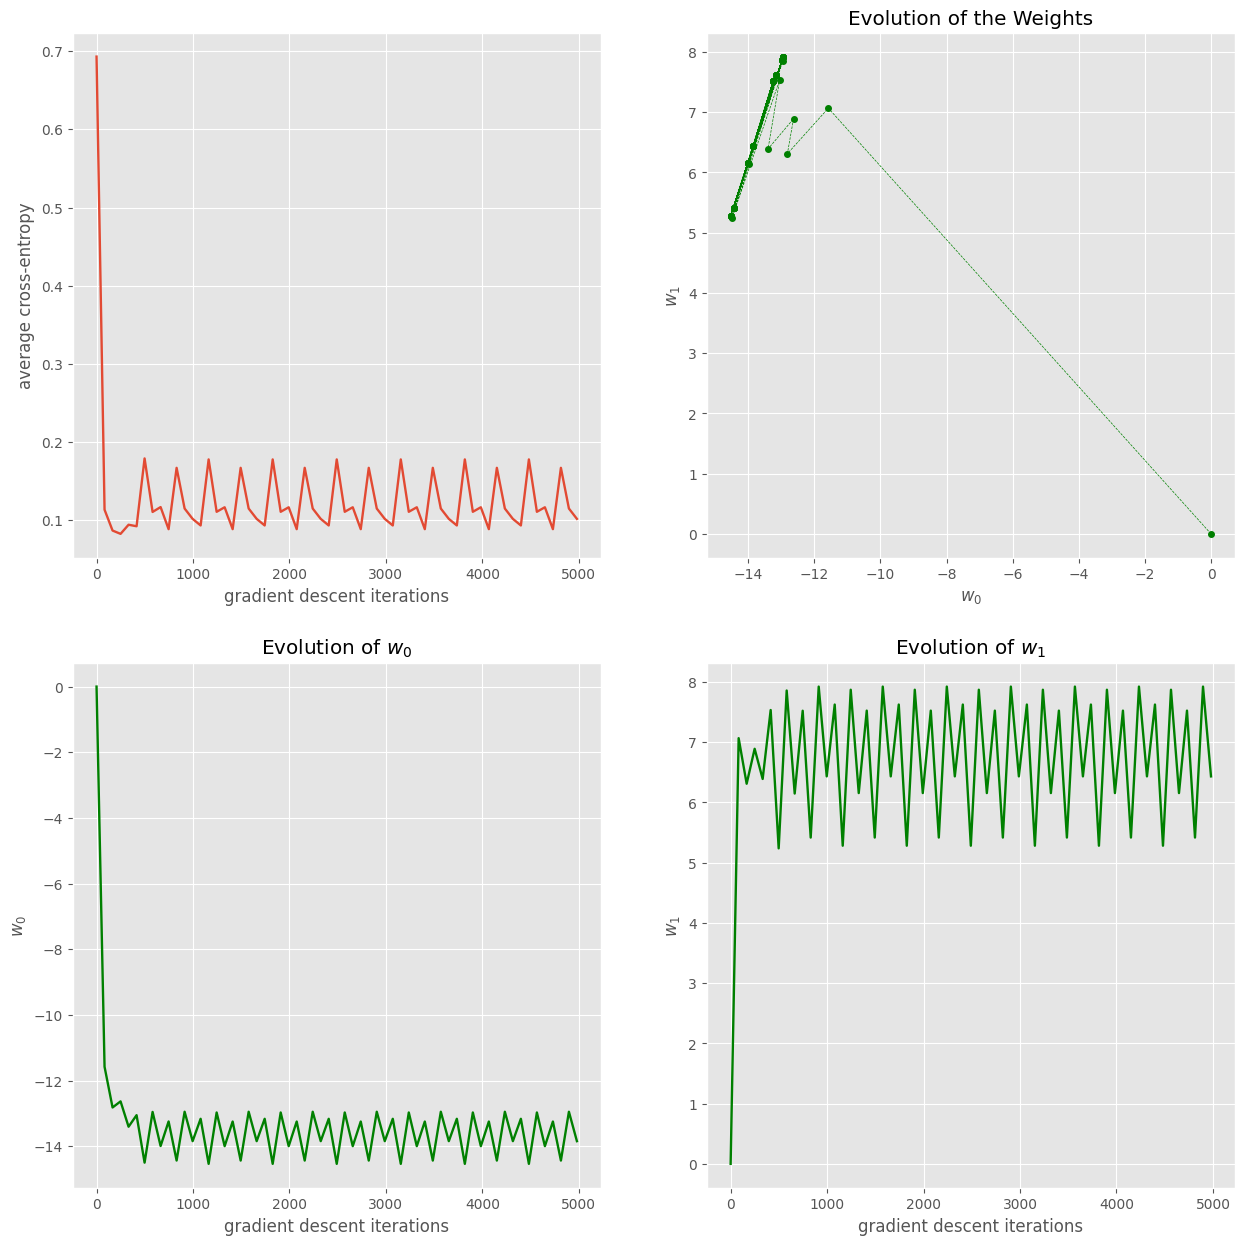

In [ ]:
# One problem here is that Gradient Descent algorithms are quite sensitive
# to initial conditions and it is often beneficial to rescale or offset
# the features to improve the performance.
#
# In our case we note that balance ranges from 0 to about 2500.
# this is much larger in magnitude to the first feature which is simply 1.
# Thus we (arbitrarily) rescale by factor of 1/1000

X[:,1] = balance[:]/1000;

# note to self: we'll need to apply this rescaling
# everytime we are making predictions.

# starting again Gradient Descent with same parameters
w, loss, its, ws = gradient_descent(w0, X, y, learning_rate=40, maxit=5000);
print(w)

# plot of the loss graph
plot_loss_graph_and_weight_evolution(loss, ws, its)



In [ ]:
# we can see that we are doing much better, with the loss going down to about an
# avg cross entropy of 0.1, but it still seems to be oscillating,
# which indicates that the learning rate is probably too high (see lecture notes)

In [ ]:
# note that you can also check if you reached convergence by checking if the
# gradient is null (or at least very small):

print(lab_2.gradient(w, X, y))

[-0.0261974  -0.04420146]


learning rate = 25
starting gradient descent


  2%|▏         | 64/3000 [00:00<00:04, 634.85it/s]

[0.5 0.5 0.5 ... 0.5 0.5 0.5]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[0.500001 0.500001 0.500001 ... 0.500001 0.500001 0.500001]
[2.90495129e-03 4.61137844e-03 1.76706054e-02 ... 5.35040514e-03
 1.98406349e-01 1.77643597e-04]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[2.90595129e-03 4.61237844e-03 1.76716054e-02 ... 5.35140514e-03
 1.98407349e-01 1.78643597e-04]


  8%|▊         | 242/3000 [00:00<00:04, 552.84it/s]

[1.16188239e-03 1.84721024e-03 7.14487174e-03 ... 2.14454477e-03
 9.03282723e-02 7.07221533e-05]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.16288239e-03 1.84821024e-03 7.14587174e-03 ... 2.14554477e-03
 9.03292723e-02 7.17221533e-05]
[1.40026762e-03 2.27252741e-03 9.32427754e-03 ... 2.65581199e-03
 1.27444890e-01 7.52103975e-05]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.40126762e-03 2.27352741e-03 9.32527754e-03 ... 2.65681199e-03
 1.27445890e-01 7.62103975e-05]


 14%|█▎        | 407/3000 [00:00<00:04, 521.75it/s]

[1.27898533e-03 2.06610702e-03 8.36755318e-03 ... 2.41100527e-03
 1.13083797e-01 7.06694748e-05]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.27998533e-03 2.06710702e-03 8.36855318e-03 ... 2.41200527e-03
 1.13084797e-01 7.16694748e-05]
[1.31628272e-03 2.13075464e-03 8.68017993e-03 ... 2.48809015e-03
 1.18074127e-01 7.18207315e-05]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.31728272e-03 2.13175464e-03 8.68117993e-03 ... 2.48909015e-03
 1.18075127e-01 7.28207315e-05]


 19%|█▉        | 579/3000 [00:01<00:04, 510.55it/s]

[1.30222638e-03 2.10661817e-03 8.56592884e-03 ... 2.45938943e-03
 1.16301923e-01 7.13388311e-05]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.30322638e-03 2.10761817e-03 8.56692884e-03 ... 2.46038943e-03
 1.16302923e-01 7.23388311e-05]
[1.30695646e-03 2.11478698e-03 8.60511272e-03 ... 2.46911946e-03
 1.16920496e-01 7.14913183e-05]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.30795646e-03 2.11578698e-03 8.60611272e-03 ... 2.47011946e-03
 1.16921496e-01 7.24913183e-05]


 26%|██▌       | 770/3000 [00:01<00:03, 560.81it/s]

[1.30525222e-03 2.11185618e-03 8.59119125e-03 ... 2.46563289e-03
 1.16703477e-01 7.14338195e-05]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.30625222e-03 2.11285618e-03 8.59219125e-03 ... 2.46663289e-03
 1.16704477e-01 7.24338195e-05]
[1.30583497e-03 2.11286178e-03 8.59600595e-03 ... 2.46683039e-03
 1.16779297e-01 7.14527778e-05]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.30683497e-03 2.11386178e-03 8.59700595e-03 ... 2.46783039e-03
 1.16780297e-01 7.24527778e-05]
[1.30562709e-03 2.11250411e-03 8.59430501e-03 ... 2.46640483e-03
 1.16752740e-01 7.14458011e-05]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]

 32%|███▏      | 973/3000 [00:01<00:02, 772.06it/s]


10000
(10000,)
[1.30662709e-03 2.11350411e-03 8.59530501e-03 ... 2.46740483e-03
 1.16753740e-01 7.24458011e-05]
[1.30569860e-03 2.11262746e-03 8.59489507e-03 ... 2.46655170e-03
 1.16762022e-01 7.14481373e-05]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.30669860e-03 2.11362746e-03 8.59589507e-03 ... 2.46755170e-03
 1.16763022e-01 7.24481373e-05]
[1.30567321e-03 2.11258376e-03 8.59468712e-03 ... 2.46649970e-03
 1.16758772e-01 7.14472880e-05]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.30667321e-03 2.11358376e-03 8.59568712e-03 ... 2.46749970e-03
 1.16759772e-01 7.24472880e-05]


 43%|████▎     | 1286/3000 [00:01<00:01, 951.31it/s]

[1.30568198e-03 2.11259888e-03 8.59475940e-03 ... 2.46651770e-03
 1.16759908e-01 7.14475752e-05]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.30668198e-03 2.11359888e-03 8.59575940e-03 ... 2.46751770e-03
 1.16760908e-01 7.24475752e-05]
[1.30567888e-03 2.11259354e-03 8.59473397e-03 ... 2.46651135e-03
 1.16759510e-01 7.14474717e-05]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.30667888e-03 2.11359354e-03 8.59573397e-03 ... 2.46751135e-03
 1.16760510e-01 7.24474717e-05]
[1.30567995e-03 2.11259539e-03 8.59474282e-03 ... 2.46651355e-03
 1.16759649e-01 7.14475070e-05]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.30667995e-03 2.11359539e-03 8.59574282e-03 ... 2.46751355e-03
 1.16760649e-01 7.24475070e-05]


 50%|████▉     | 1498/3000 [00:02<00:01, 933.13it/s]

[1.30567957e-03 2.11259474e-03 8.59473971e-03 ... 2.46651278e-03
 1.16759601e-01 7.14474944e-05]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.30667957e-03 2.11359474e-03 8.59573971e-03 ... 2.46751278e-03
 1.16760601e-01 7.24474944e-05]
[1.30567970e-03 2.11259497e-03 8.59474080e-03 ... 2.46651305e-03
 1.16759618e-01 7.14474987e-05]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.30667970e-03 2.11359497e-03 8.59574080e-03 ... 2.46751305e-03
 1.16760618e-01 7.24474987e-05]
[1.30567966e-03 2.11259489e-03 8.59474042e-03 ... 2.46651295e-03
 1.16759612e-01 7.14474971e-05]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.30667966e-03 2.11359489e-03 8.59574042e-03 ... 2.46751295e-03
 1.16760612e-01 7.24474971e-05]


 57%|█████▋    | 1706/3000 [00:02<00:01, 941.64it/s]

[1.30567967e-03 2.11259491e-03 8.59474055e-03 ... 2.46651298e-03
 1.16759614e-01 7.14474977e-05]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.30667967e-03 2.11359491e-03 8.59574055e-03 ... 2.46751298e-03
 1.16760614e-01 7.24474977e-05]
[1.30567967e-03 2.11259490e-03 8.59474050e-03 ... 2.46651297e-03
 1.16759613e-01 7.14474975e-05]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.30667967e-03 2.11359490e-03 8.59574050e-03 ... 2.46751297e-03
 1.16760613e-01 7.24474975e-05]
[1.30567967e-03 2.11259491e-03 8.59474052e-03 ... 2.46651298e-03
 1.16759613e-01 7.14474975e-05]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.30667967e-03 2.11359491e-03 8.59574052e-03 ... 2.46751298e-03
 1.16760613e-01 7.24474975e-05]


 67%|██████▋   | 2007/3000 [00:02<00:01, 946.00it/s]

[1.30567967e-03 2.11259491e-03 8.59474051e-03 ... 2.46651298e-03
 1.16759613e-01 7.14474975e-05]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.30667967e-03 2.11359491e-03 8.59574051e-03 ... 2.46751298e-03
 1.16760613e-01 7.24474975e-05]
[1.30567967e-03 2.11259491e-03 8.59474052e-03 ... 2.46651298e-03
 1.16759613e-01 7.14474975e-05]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.30667967e-03 2.11359491e-03 8.59574052e-03 ... 2.46751298e-03
 1.16760613e-01 7.24474975e-05]
[1.30567967e-03 2.11259491e-03 8.59474051e-03 ... 2.46651298e-03
 1.16759613e-01 7.14474975e-05]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.30667967e-03 2.11359491e-03 8.59574051e-03 ... 2.46751298e-03
 1.16760613e-01 7.24474975e-05]


 75%|███████▍  | 2238/3000 [00:02<00:00, 1052.07it/s]

[1.30567967e-03 2.11259491e-03 8.59474051e-03 ... 2.46651298e-03
 1.16759613e-01 7.14474975e-05]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.30667967e-03 2.11359491e-03 8.59574051e-03 ... 2.46751298e-03
 1.16760613e-01 7.24474975e-05]
[1.30567967e-03 2.11259491e-03 8.59474051e-03 ... 2.46651298e-03
 1.16759613e-01 7.14474975e-05]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.30667967e-03 2.11359491e-03 8.59574051e-03 ... 2.46751298e-03
 1.16760613e-01 7.24474975e-05]
[1.30567967e-03 2.11259491e-03 8.59474051e-03 ... 2.46651298e-03
 1.16759613e-01 7.14474975e-05]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.30667967e-03 2.11359491e-03 8.59574051e-03 ... 2.46751298e-03
 1.16760613e-01 7.24474975e-05]


 82%|████████▏ | 2446/3000 [00:03<00:00, 971.97it/s] 

[1.30567967e-03 2.11259491e-03 8.59474051e-03 ... 2.46651298e-03
 1.16759613e-01 7.14474975e-05]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.30667967e-03 2.11359491e-03 8.59574051e-03 ... 2.46751298e-03
 1.16760613e-01 7.24474975e-05]
[1.30567967e-03 2.11259491e-03 8.59474051e-03 ... 2.46651298e-03
 1.16759613e-01 7.14474975e-05]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.30667967e-03 2.11359491e-03 8.59574051e-03 ... 2.46751298e-03
 1.16760613e-01 7.24474975e-05]
[1.30567967e-03 2.11259491e-03 8.59474051e-03 ... 2.46651298e-03
 1.16759613e-01 7.14474975e-05]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.30667967e-03 2.11359491e-03 8.59574051e-03 ... 2.46751298e-03
 1.16760613e-01 7.24474975e-05]


 93%|█████████▎| 2780/3000 [00:03<00:00, 1038.13it/s]

[1.30567967e-03 2.11259491e-03 8.59474051e-03 ... 2.46651298e-03
 1.16759613e-01 7.14474975e-05]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.30667967e-03 2.11359491e-03 8.59574051e-03 ... 2.46751298e-03
 1.16760613e-01 7.24474975e-05]
[1.30567967e-03 2.11259491e-03 8.59474051e-03 ... 2.46651298e-03
 1.16759613e-01 7.14474975e-05]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.30667967e-03 2.11359491e-03 8.59574051e-03 ... 2.46751298e-03
 1.16760613e-01 7.24474975e-05]
[1.30567967e-03 2.11259491e-03 8.59474051e-03 ... 2.46651298e-03
 1.16759613e-01 7.14474975e-05]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.30667967e-03 2.11359491e-03 8.59574051e-03 ... 2.46751298e-03
 1.16760613e-01 7.24474975e-05]


100%|█████████▉| 2996/3000 [00:03<00:00, 942.54it/s] 

[1.30567967e-03 2.11259491e-03 8.59474051e-03 ... 2.46651298e-03
 1.16759613e-01 7.14474975e-05]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.30667967e-03 2.11359491e-03 8.59574051e-03 ... 2.46751298e-03
 1.16760613e-01 7.24474975e-05]
[1.30567967e-03 2.11259491e-03 8.59474051e-03 ... 2.46651298e-03
 1.16759613e-01 7.14474975e-05]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.30667967e-03 2.11359491e-03 8.59574051e-03 ... 2.46751298e-03
 1.16760613e-01 7.24474975e-05]
[1.30567967e-03 2.11259491e-03 8.59474051e-03 ... 2.46651298e-03
 1.16759613e-01 7.14474975e-05]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
10000
(10000,)
[1.30667967e-03 2.11359491e-03 8.59574051e-03 ... 2.46751298e-03
 1.16760613e-01 7.24474975e-05]


100%|██████████| 3000/3000 [00:03<00:00, 805.38it/s]


3000
[-2.09787743e-15 -3.46602747e-15]


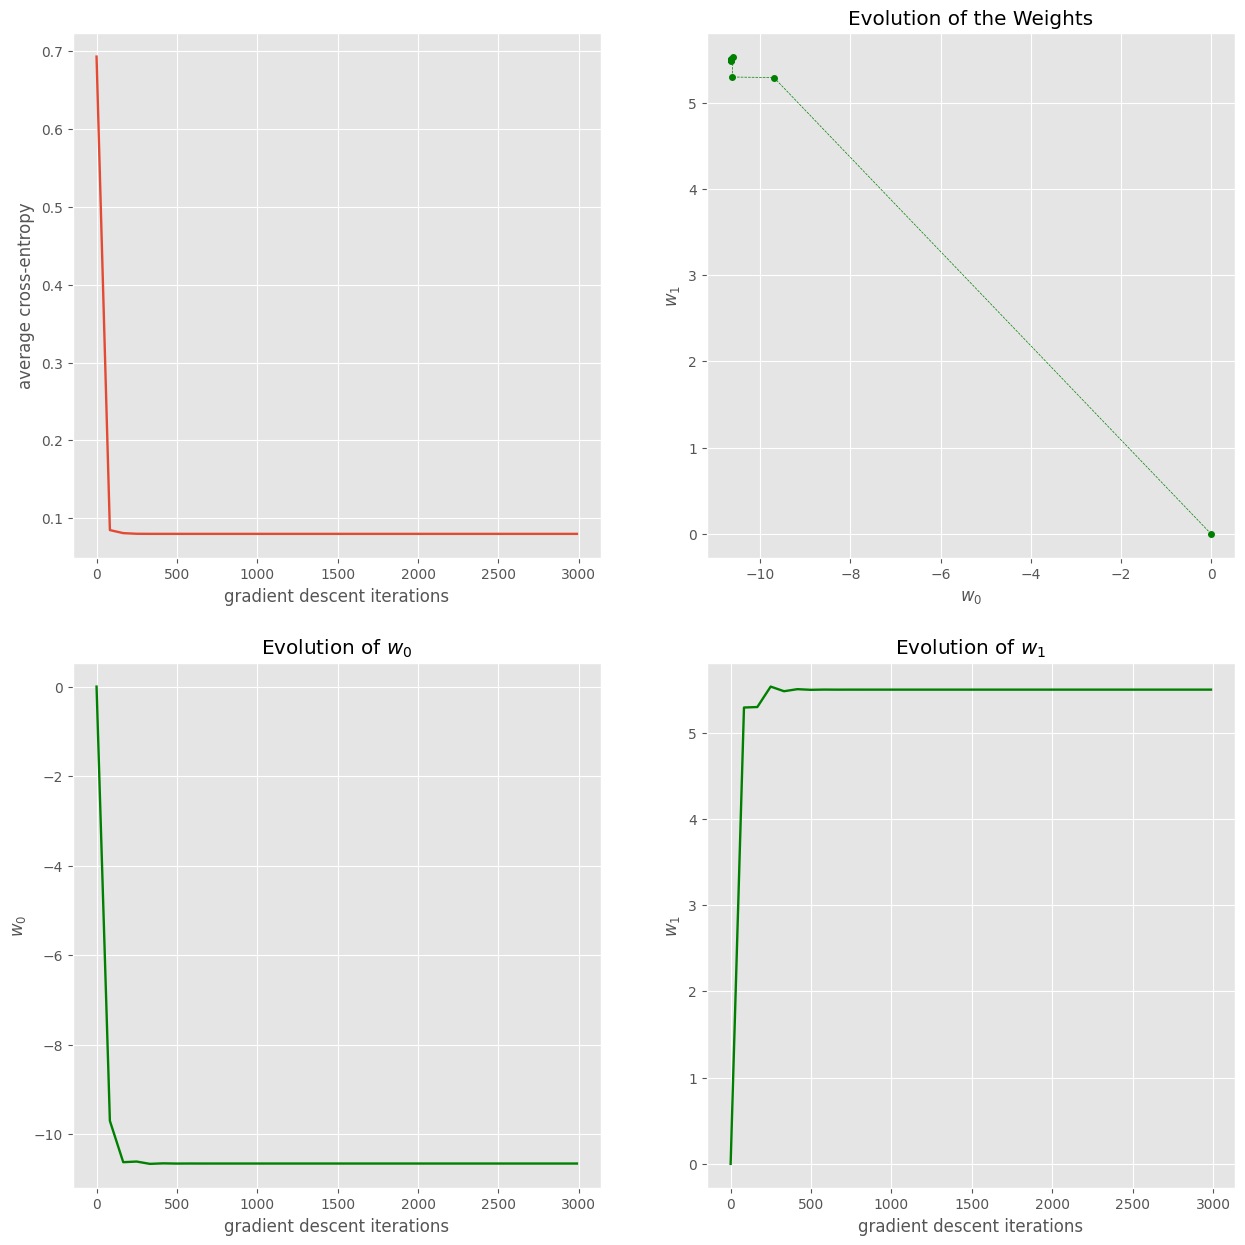

In [ ]:
# Exercise: study the convergence for a few different learning rates,
# and observe the different behaviours.
# for instance you can try lr values in {150, 30, 10, 1, 0.001}

learning_rates = [25] # change learning rate here
w0 = np.array([0,0]);

for lr in learning_rates :
  print(f"learning rate = {lr}")
  w, loss, its, ws = gradient_descent(w0, X, y, learning_rate=lr, maxit=3000);
  plot_loss_graph_and_weight_evolution(loss, ws, its)

# Question 3
# Find the learning rate that allows us to converge the fastest to the global optimum.
# eg. lr = 45 (doesn't have to be super precise, push to assessment to check if answer is ok)
# write answer in question_3 of lab_2.py


In [ ]:
# In logistic Regression, we set a parametric model for the likelihood
# we denote logit = x'w and parametrise the likelihood as
# p(y_i=1|logit) = 1/(1 + exp(-logit))
#
# We want to verify that this is a correct approximation for our problem
#
# The following function makes an empirical measurement of p(y_i=1|logit)
# by recording in the dataset the proportion of default=True for
# a particular logit value (within some small threshold T=1).

def get_empirical_likelihood(logit, logits_train, y):
    # selecting all logits in training set that are +/- 0.5 of given logit
    valid = ((logits_train < logit + 0.5) & (logits_train > logit - 0.5));
    n_positives = sum(valid[y==True]);
    n_negatives = sum(valid[y==False]);
    empirical_likelihood = n_positives / (n_positives  + n_negatives);
    return empirical_likelihood


# taking an ok value for w:
w = np.array([-10.63971053,   5.49188453])

# testing set consists of regularly sampled 100 values of balance
n_test = 100
X_test = np.zeros(shape=(n_test,2))
X_test[0:n_test,0] = 1;
X_test[0:n_test,1] = np.linspace(X[:,1].min(), X[:,1].max(), num=n_test)

# making predictions for these values
p_test = lab_2.predict(w, X_test)

# we compute the logit values and their corresponding empirical probabilities of default
logits_test = lab_2.logit(w, X_test)
logits_train = lab_2.logit(w, X)
p_empirical = [get_empirical_likelihood(logit, logits_train, y)
                  for logit in logits_test ];

# plot the graphs

plt.scatter(X[y==False,1], y[y==False], alpha= 0.2)
plt.scatter(X[y==True,1], y[y==True], alpha= 0.2)
plt.plot(X_test[:,1], p_test, color='black')
plt.plot(X_test[:,1], p_empirical, ':', color='gray')

plt.ylabel('Probability of default');
plt.xlabel('Balance');
plt.yticks([0, 0.25, 0.5, 0.75, 1.]);
plt.legend(['logistic model for probability of default',
            'empirically measured probability of default\n(within a +/- 0.5 logit bin)',
            'No Default', 'Default'],  prop={'size': 12})
plt.show()

# you should be able to see that the logistic model is not a bad approximation
# of the empirical likelihood


In [ ]:
# At this point, we still don't have a classifier.
# All we need is to set a threshold on the predicted probabilities

# #### EXERCISE 4 ####
# In lab_2.py, write a function 'predict_class' in the module to give
# the predicted class for observations X and weights w.

# Use that function here to assess the accuracy of the classifier
# for different thresholds.

# Accuracy = percentage correctly classified.
def accuracy(w, X, y, threshold):
    return np.mean(y == lab_2.predict_class(w, X, threshold))

# taking an ok value for w:
w = np.array([-10.63971053,   5.49188453])

print("Accuracy for T=0.25: {}".format(accuracy(w, X, y, threshold=0.25)))
print("Accuracy for T=0.50: {}".format(accuracy(w, X, y, threshold=0.5)))
print("Accuracy for T=0.75: {}".format(accuracy(w, X, y, threshold=0.75)))
print("Accuracy for T=0.95: {}".format(accuracy(w, X, y, threshold=0.95)))

# #### EXERCISE 5 ####
# in lab_2.py, update function 'question_5' to
# return the accuracy for a threshold of 0.75

[1.31416961e-03 2.12501297e-03 8.62949383e-03 ... 2.48051494e-03
 1.16820078e-01 7.21804527e-05]
[0. 0. 0. ... 0. 0. 0.]
Accuracy for T=0.25: 0.9653
[1.31416961e-03 2.12501297e-03 8.62949383e-03 ... 2.48051494e-03
 1.16820078e-01 7.21804527e-05]
[0. 0. 0. ... 0. 0. 0.]
Accuracy for T=0.50: 0.9725
[1.31416961e-03 2.12501297e-03 8.62949383e-03 ... 2.48051494e-03
 1.16820078e-01 7.21804527e-05]
[0. 0. 0. ... 0. 0. 0.]
Accuracy for T=0.75: 0.9698
[1.31416961e-03 2.12501297e-03 8.62949383e-03 ... 2.48051494e-03
 1.16820078e-01 7.21804527e-05]
[0. 0. 0. ... 0. 0. 0.]
Accuracy for T=0.95: 0.9671


# Multinomial Logistic Regression



In [ ]:
# Let's now see how to work with more than 2 classes.
# loading the Iris dataset.
# This is a foumous 3-classes dataset, from Fisher, 1936

from sklearn.datasets import load_iris
iris = load_iris()
print(iris['DESCR'])


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

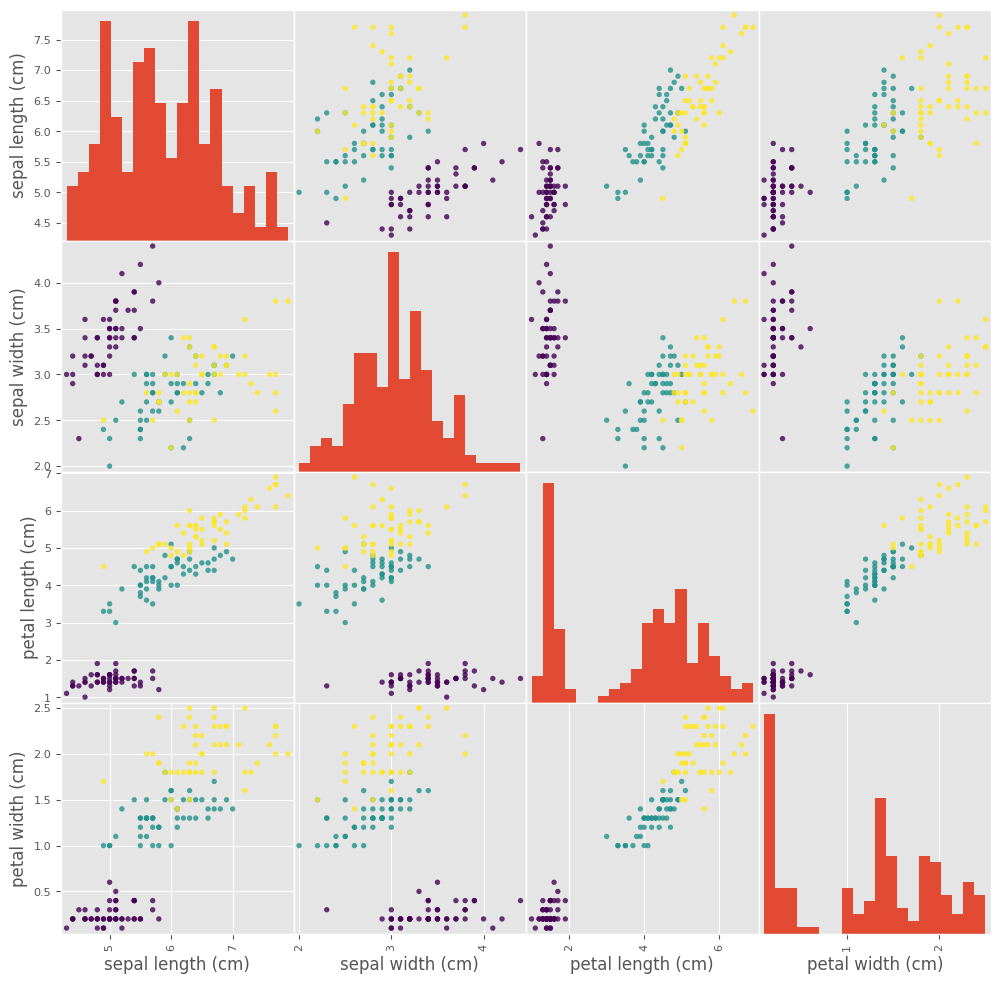

In [ ]:
# let's explore the dataset
# as we have 4 features, we will break down the visualisation into pairs of
# features

X = iris.data
Y = iris.target
class_names = iris.target_names
feature_names = iris.feature_names

df = pd.DataFrame(X, columns=iris.feature_names)

grr = pd.plotting.scatter_matrix(df, c=Y, figsize=(12, 12),grid=True,
                                 hist_kwds={'bins': 20}, s=60, alpha=.8)


In [151]:
# we are going to split the dataset into training and test tests in a 70/30 ratio

trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.3, random_state = 11)


In [152]:
# this time we'll use off-the-shelf functions to get the optimisation

log_reg = LogisticRegression(solver='newton-cg', multi_class='multinomial',random_state = 11)
log_reg.fit(trainX, trainY)
y_pred = log_reg.predict(testX)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [153]:
print('Accuracy:   {:.2f}'.format(np.mean(testY ==  y_pred)))
print('Error rate: {:.2f}'.format(1 - np.mean(testY ==  y_pred)))


Accuracy:   0.93
Error rate: 0.07


In [154]:
# #### EXERCISE 6 ####
#
# Quiz-style: return the bias in weight vector associated with logit of class=0
print (log_reg.intercept_)
print (log_reg.intercept_[0])
print (log_reg.coef_)
print (log_reg.coef_[0])
# hint: biases can be obtained from log_reg.intercept_
#       and the other coefficients from log_reg.coef_.


[  8.6786403    2.92284174 -11.60148204]
8.67864029967296
[[-0.38752443  0.86335975 -2.2509408  -0.96820808]
 [ 0.46601066 -0.67170937 -0.13524523 -0.81501279]
 [-0.07848623 -0.19165037  2.38618603  1.78322087]]
[-0.38752443  0.86335975 -2.2509408  -0.96820808]


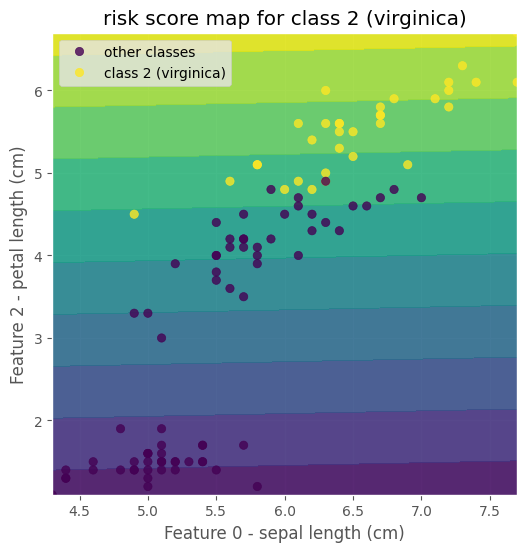

In [155]:
# In multinomial logistic regression, we have one score/logit per class
# the logit is obtained from its own weight vector.
# We propose here to visualise the score/logit map for each of the classes.

# the point of this cell is for you to visualise what the score maps do
# just try different class ids and on different feature pairs.

classid = 2; # you can change this to 0,1,2

# Plot the risk score map (x'w_k) for the associated class weights vector w_k.
featx = 0 # feat 0 will be on x-axis, you can change this to 0,1,2,3
featy = 2 # feat 1 will be on y-axis, you can change this to 0,1,2,3

# getting area of interest

x_min = trainX[:,featx].min()
x_max = trainX[:,featx].max()
y_min = trainX[:,featy].min()
y_max = trainX[:,featy].max()

# grid sampling the feature space
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 256), np.linspace(y_min, y_max, 256))

# making prediction for point on grid
Z = log_reg.coef_[classid,featx] * xx + yy * log_reg.coef_[classid,featy]

# plot score map
plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, Z, levels=10, alpha=0.9)
# overlay dataset points
scatter = plt.scatter(trainX[:, featx], trainX[:, featy], c=(trainY==classid), alpha=0.8)

kw = scatter.legend_elements()
kw[1][0] = f"other classes"
kw[1][1] = f"class {classid} ({class_names[classid]})"
plt.legend(*kw)

plt.xlabel(f"Feature {featx} - {feature_names[featx]}")
plt.ylabel(f"Feature {featy} - {feature_names[featy]}")
plt.title(f"risk score map for class {classid} ({class_names[classid]})")
plt.show()




In [174]:
# #### EXERCISE 7 ####
#
# Feature 0 - sepal Length (cm)
# Feature 1 - Sepal Width (cm)
# Feature 2 - Petal Length (cm)
# Feature 3 - Petal Width (cm)
#
# In this exercise, you must find the best pair of features in the iris dataset.
#
# To find this pair, you will consider every possible pair and reduce the
# input features to only that pair (and ignore the other two features).
#
# hint:
# iterate through all possible pairs and for each pair:
# 1. modify both training and test sets to only include the two considered features
# 2. train a multinomial logistic regression model based on this reduced feature set
# 3. make prediction on the reduced test set
# 4. report accuracy for that pair
#
# you can work in this notebook, but you need to report the best pair
# and the accuracy in question_7 in lab_2.py
X = iris.data
Y = iris.target
#trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.3, random_state = 11)
print(len(X)) #*0.7 --> 150
print(len(trainX))


feat1 = [0,1,2,3]
feat2 = [0,1,2,3]
accuracy = -10
best_feat = [0,0]
log_reg = LogisticRegression(solver='newton-cg', multi_class='multinomial',random_state = 11)
new_data = np.zeros((len(X),2))

for j in feat1:
 for i in feat2:
  new_data[: ,0]= X[:,feat1[j]].transpose()
  new_data[: ,1]= X[:,feat2[i]].transpose()
  trainX, testX, trainY, testY = train_test_split(new_data, Y, test_size = 0.3, random_state = 11)
  log_reg.fit(trainX,trainY)
  y_pred = log_reg.predict(testX)
  #print("for {} and {}".format(feat1[i], feat2[j]))
  #print('Accuracy:   {:.2f}'.format(np.mean(testY ==  y_pred)))
  #print('Error rate: {:.2f}'.format(1 - np.mean(testY ==  y_pred)))
  if (accuracy < np.mean(testY == y_pred) and i!=j):
   accuracy = np.mean(testY ==  y_pred)
   best_feat = [i,j]

print(accuracy)
print(best_feat)

#print(len(x_feat))
#print(len(y_feat))
#print(trainX)
#print(trainX)
#print(x_feat)
#print(x_feat)

#0.9555555555555556
#[2, 0]



150
105


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

0.9555555555555556
[2, 0]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
